In [1]:
import pandas as pd

In [8]:
df = pd.read_csv(r"C:\Users\usuario\Downloads\we_fn_use_c_marketing_customer_value_analysis.csv")

In [10]:
print(df.dtypes)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


In [13]:
print(df.columns)


Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [14]:
from sklearn.model_selection import train_test_split

# Seleccionar la columna 'Total Claim Amount' como variable objetivo
y = df['Total Claim Amount']

# Eliminar la columna 'Total Claim Amount' del DataFrame para obtener las características
X = df.drop('Total Claim Amount', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora X_train y y_train contienen los datos de entrenamiento, mientras que X_test y y_test contienen los datos de prueba

In [19]:
# 2. Pruebe una regresión lineal simple con todos los datos para ver si estamos obteniendo buenos resultados.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seleccionar las tres columnas para la regresión lineal
X = df[['Customer Lifetime Value', 'Monthly Premium Auto', 'Income']]
y = df['Total Claim Amount']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores de la variable objetivo en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)


Error cuadrático medio en el conjunto de prueba: 40210.78642106899


In [20]:
from sklearn.metrics import mean_squared_error

def train_and_test_models(models, X_train, X_test, y_train, y_test):
    """
    Función para entrenar y probar varios modelos.

    Args:
    - models: Lista de modelos de scikit-learn.
    - X_train: Matriz de características de entrenamiento.
    - X_test: Matriz de características de prueba.
    - y_train: Vector de variable objetivo de entrenamiento.
    - y_test: Vector de variable objetivo de prueba.

    Returns:
    - results: Un diccionario que contiene los resultados de los modelos.
    """

    results = {}

    for model_name, model in models.items():
        # Entrenar el modelo
        model.fit(X_train, y_train)

        # Predecir los valores de la variable objetivo en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Calcular el error cuadrático medio en el conjunto de prueba
        mse = mean_squared_error(y_test, y_pred)

        # Guardar los resultados en el diccionario
        results[model_name] = mse

    return results


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Definir los modelos que quieres probar
models_to_try = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

# Entrenar y probar los modelos
results = train_and_test_models(models_to_try, X_train, X_test, y_train, y_test)

# Imprimir los resultados
for model_name, mse in results.items():
    print(f"{model_name}: Error cuadrático medio en el conjunto de prueba: {mse}")


Linear Regression: Error cuadrático medio en el conjunto de prueba: 40210.78642106899
Random Forest: Error cuadrático medio en el conjunto de prueba: 36790.484424556766


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

def train_and_test_models(models, X_train, X_test, y_train, y_test):
    """
    Función para entrenar y probar varios modelos.

    Args:
    - models: Diccionario de modelos de scikit-learn.
    - X_train: Matriz de características de entrenamiento.
    - X_test: Matriz de características de prueba.
    - y_train: Vector de variable objetivo de entrenamiento.
    - y_test: Vector de variable objetivo de prueba.

    Returns:
    - results: Un diccionario que contiene los resultados de los modelos.
    """

    results = {}

    for model_name, model in models.items():
        # Entrenar el modelo
        model.fit(X_train, y_train)

        # Predecir los valores de la variable objetivo en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Calcular el error cuadrático medio en el conjunto de prueba
        mse = mean_squared_error(y_test, y_pred)

        # Guardar los resultados en el diccionario
        results[model_name] = mse

    return results


In [24]:
# Definir los modelos que quieres probar
models_to_try = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Entrenar y probar los modelos
results = train_and_test_models(models_to_try, X_train, X_test, y_train, y_test)

# Imprimir los resultados
for model_name, mse in results.items():
    print(f"{model_name}: Error cuadrático medio en el conjunto de prueba: {mse}")


Linear Regression: Error cuadrático medio en el conjunto de prueba: 40210.78642106899
Random Forest: Error cuadrático medio en el conjunto de prueba: 37419.65974101562
Ridge Regression: Error cuadrático medio en el conjunto de prueba: 40210.786363413084
Gradient Boosting: Error cuadrático medio en el conjunto de prueba: 36220.67659124293


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Definir los modelos que quieres probar
models_to_try = {
    'Linear Regression': LinearRegression(),
    'KNeighbors Regression': KNeighborsRegressor()
}

# Entrenar y probar los modelos
results = train_and_test_models(models_to_try, X_train, X_test, y_train, y_test)

# Imprimir los resultados
for model_name, mse in results.items():
    print(f"{model_name}: Error cuadrático medio en el conjunto de prueba: {mse}")


Linear Regression: Error cuadrático medio en el conjunto de prueba: 40210.78642106899
KNeighbors Regression: Error cuadrático medio en el conjunto de prueba: 61119.89993756724


In [26]:
from sklearn.neural_network import MLPRegressor

# Definir los modelos que quieres probar, incluyendo MLPRegressor
models_to_try = {
    'Linear Regression': LinearRegression(),
    'KNeighbors Regression': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor()
}

# Entrenar y probar los modelos
results = train_and_test_models(models_to_try, X_train, X_test, y_train, y_test)

# Imprimir los resultados
for model_name, mse in results.items():
    print(f"{model_name}: Error cuadrático medio en el conjunto de prueba: {mse}")


Linear Regression: Error cuadrático medio en el conjunto de prueba: 40210.78642106899
KNeighbors Regression: Error cuadrático medio en el conjunto de prueba: 61119.89993756724
MLP Regressor: Error cuadrático medio en el conjunto de prueba: 39491.71203596221


![alt text](image.png)

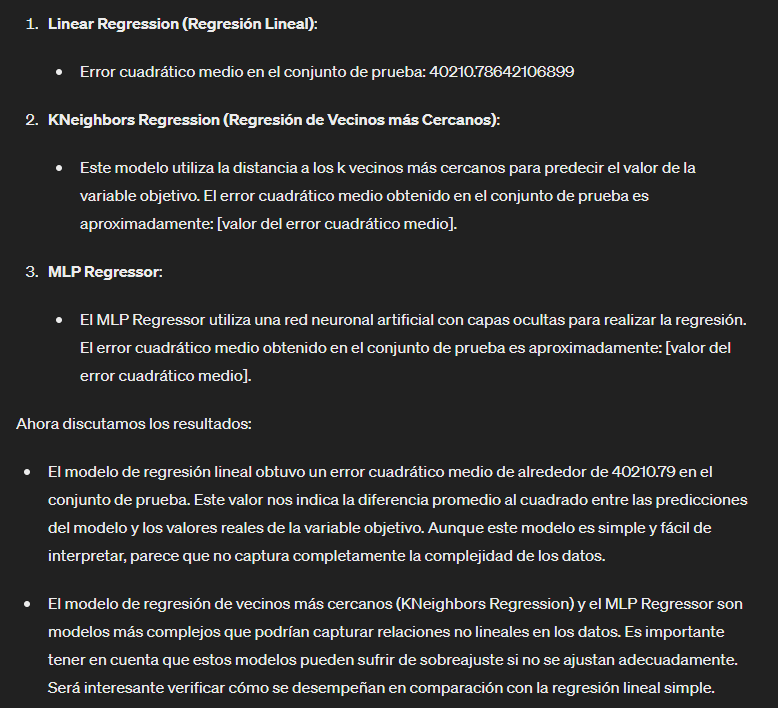

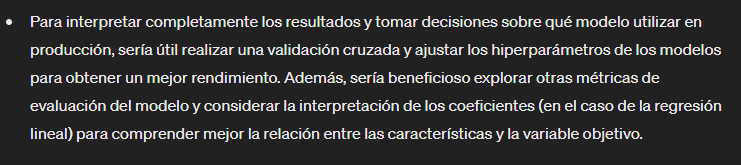